SAS Connection established. Subprocess id is 19132




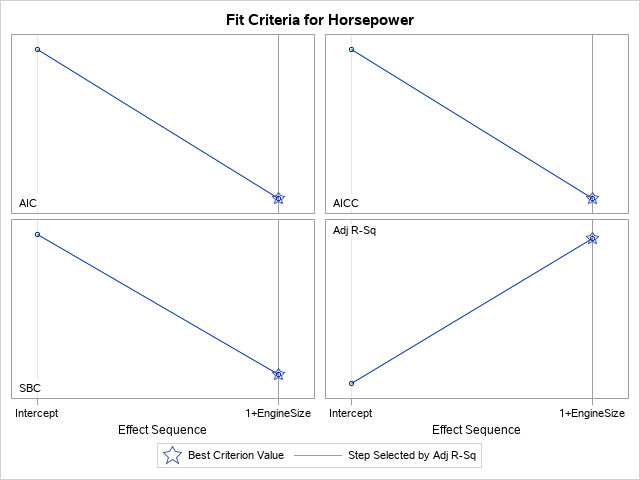
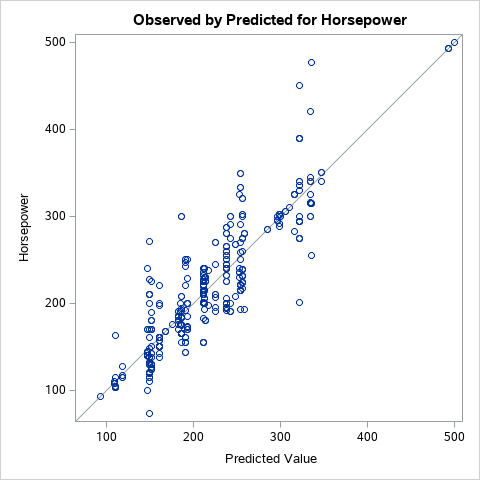
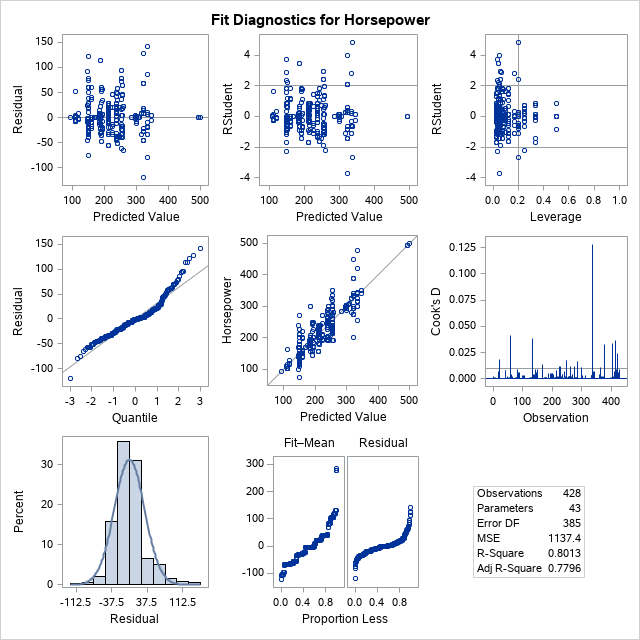
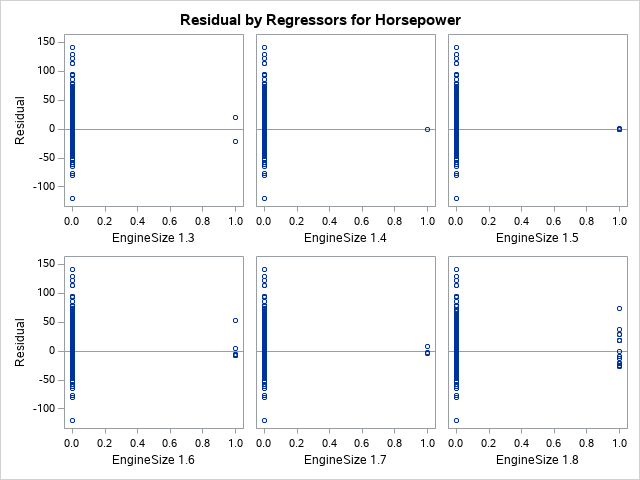
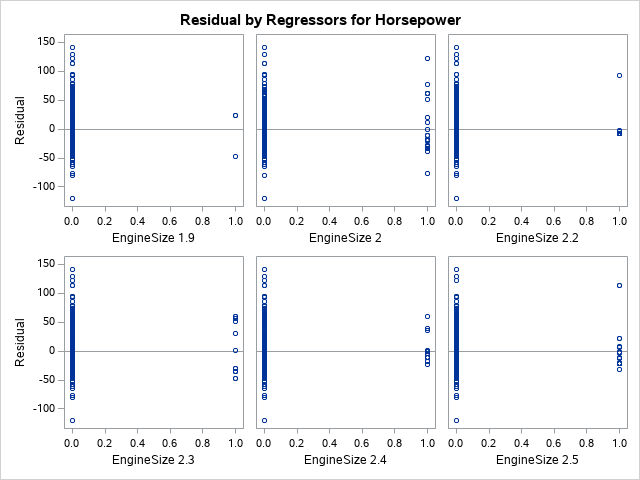
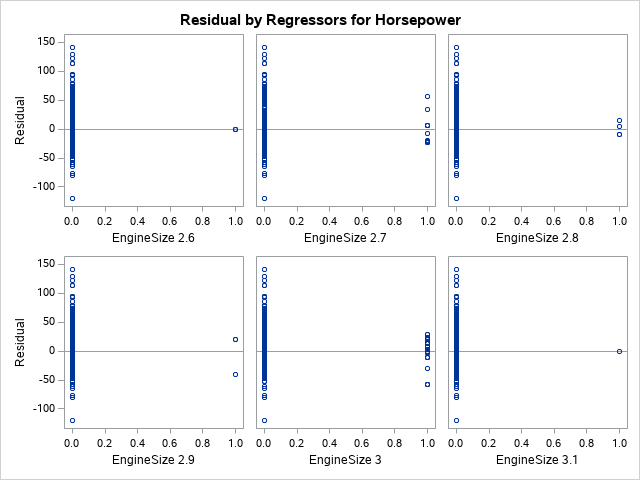
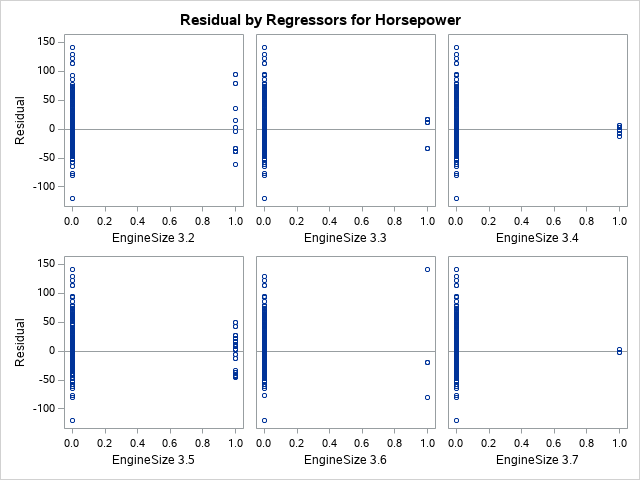
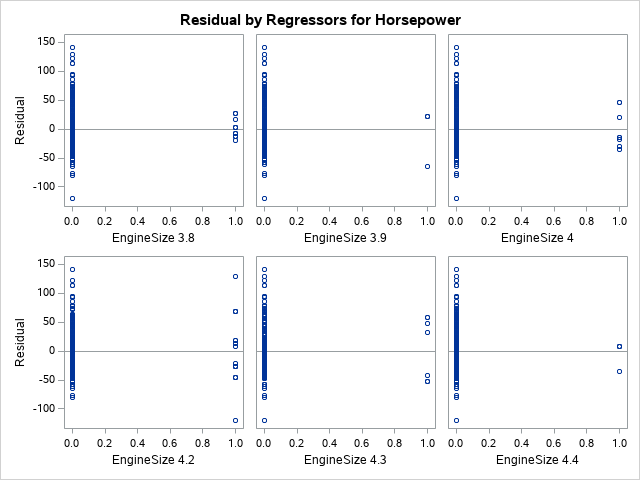
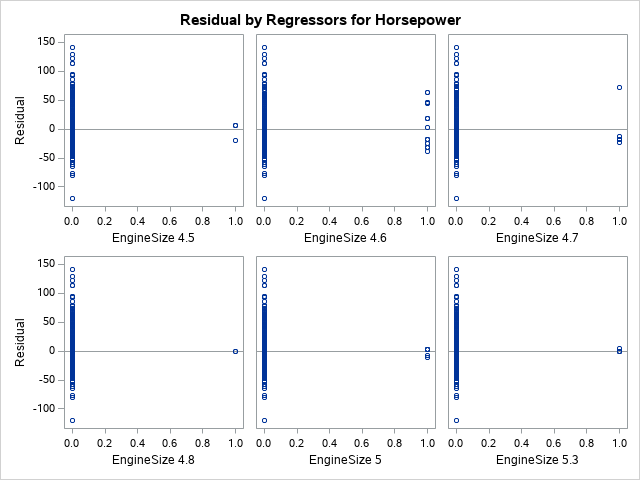
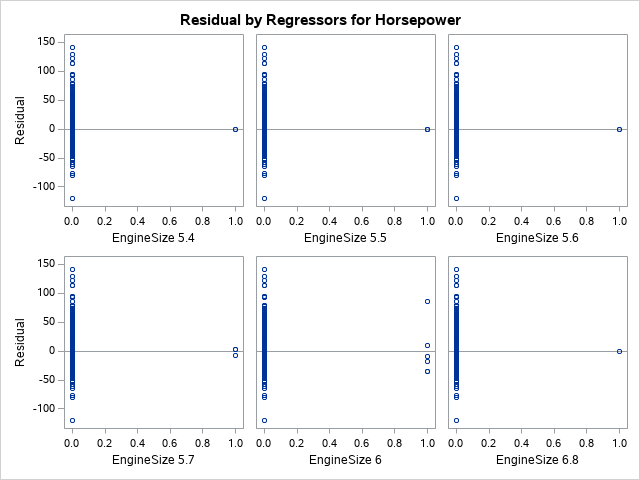
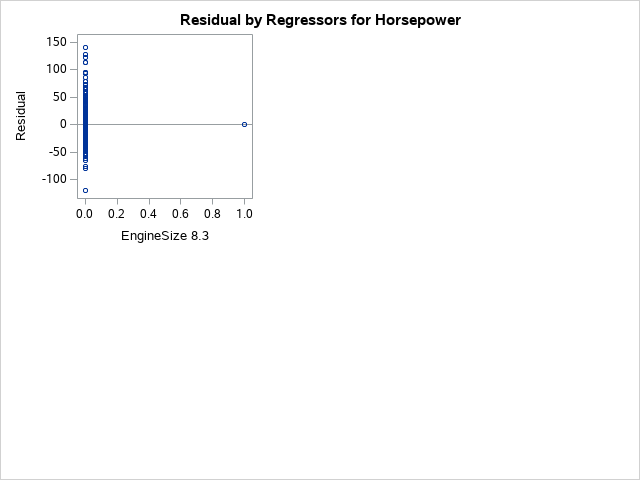

In [1]:
ods noproctitle;
ods graphics / imagemap=on;

proc glmselect data=SASHELP.CARS outdesign(addinputvars)=Work.reg_design 
		plots=(criterionpanel);
	class EngineSize / param=glm;
	model Horsepower=EngineSize / showpvalues selection=forward 
    
   (select=adjrsq stop=adjrsq choose=adjrsq);
run;

proc reg data=Work.reg_design alpha=0.05 plots(only)=(diagnostics residuals 
		observedbypredicted);
	where EngineSize is not missing;
	ods select DiagnosticsPanel ResidualPlot ObservedByPredicted;
	model Horsepower=&_GLSMOD /;
	output out=work.Reg_stats0001 p=p_ r=r_;
	run;
quit;

proc delete data=Work.reg_design;
run;